<a href="https://colab.research.google.com/github/noamdwc/ECG2BP/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import os
import pywt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from tqdm.notebook import tqdm
from scipy.signal import spectrogram

from concurrent.futures import ProcessPoolExecutor

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
TIME_COL = 'Time'
ECG_SIGNAL_COL = 'ECG_II'
ART_SIGNAL_COL = 'ART_MBP'

In [18]:
files = os.listdir('drive/MyDrive/data/ecg2bp/vitlab_data')

In [30]:
caseids = list(set(map(lambda x: x[:-8].split('_')[-1], files)))

In [35]:
# prompt: forach caseid, reat the art file, drop na, add binned column and save it in art_binned, make it multi proccesed

bins = [0, 55, 60, 65, 70, 100, np.inf]
labels = ['<55', '55-60', '60-65', '65-70', '70-100', '>100']
art_binned = pd.cut(art['ART_MBP'], bins=bins, labels=labels)

def process_caseid(caseid):
  # Read the .art file
  try:
    df_art = pd.read_csv(f'drive/MyDrive/data/ecg2bp/vitlab_data/art_{caseid}.csv')
  except FileNotFoundError:
    print(f"Art file not found for caseid: {caseid}")
    return

  # Drop NA
  df_art = df_art.dropna(subset=[ART_SIGNAL_COL])

  # Add binned column
  # Assuming you want to bin the SIGNAL_COL into 5 bins. Adjust the number of bins as needed.
  df_art['binned'] = pd.cut(df_art[ART_SIGNAL_COL], bins=5, labels=False)

  # Save the binned data
  df_art.to_csv(f'drive/MyDrive/data/ecg2bp/vitlab_data/art_binned_{caseid}.csv', index=False)

# Use ProcessPoolExecutor for multiprocessing
if __name__ == '__main__':
  with ProcessPoolExecutor() as executor:
    list(tqdm(executor.map(process_caseid, caseids), total=len(caseids)))


In [20]:
caseid = 6357
ecg = pd.read_parquet(f'drive/MyDrive/data/ecg2bp/vitlab_data/ecg_{caseid}.parquet')
art = pd.read_parquet(f'drive/MyDrive/data/ecg2bp/vitlab_data/art_{caseid}.parquet')
pleth = pd.read_parquet(f'drive/MyDrive/data/ecg2bp/vitlab_data/pleth_{caseid}.parquet')

In [36]:
bins = [0, 55, 60, 65, 70, 100, np.inf]
labels = ['<55', '55-60', '60-65', '65-70', '70-100', '>100']
art_binned = pd.cut(art['ART_MBP'], bins=bins, labels=labels)

In [39]:
!mkdir drive/MyDrive/data/ecg2bp/vitlab_data/art_binned

In [38]:
art_binned.value_counts()

,count
ART_MBP,
70-100,51
>100,41
<55,6
65-70,2
55-60,1
60-65,1


In [34]:
art['ART_MBP'].describe()

,ART_MBP
count,106.000000
mean,89.896226
std,35.892678
min,-37.000000
25%,79.000000
50%,92.500000
75%,105.750000
max,253.000000


In [19]:
files

['art_5811.parquet',
 'pleth_5814.parquet',
 'art_5814.parquet',
 'ecg_5814.parquet',
 'art_5815.parquet',
 'ecg_5815.parquet',
 'pleth_5815.parquet',
 'art_5816.parquet',
 'ecg_5816.parquet',
 'pleth_5816.parquet',
 'pleth_5817.parquet',
 'ecg_5817.parquet',
 'art_5817.parquet',
 'ecg_5819.parquet',
 'art_5819.parquet',
 'pleth_5819.parquet',
 'ecg_5822.parquet',
 'art_5822.parquet',
 'pleth_5822.parquet',
 'pleth_5823.parquet',
 'ecg_5823.parquet',
 'art_5823.parquet',
 'ecg_5825.parquet',
 'pleth_5825.parquet',
 'art_5825.parquet',
 'art_5826.parquet',
 'ecg_5826.parquet',
 'pleth_5826.parquet',
 'ecg_5827.parquet',
 'art_5827.parquet',
 'pleth_5827.parquet',
 'ecg_5829.parquet',
 'pleth_5829.parquet',
 'art_5829.parquet',
 'pleth_5830.parquet',
 'art_5830.parquet',
 'ecg_5830.parquet',
 'pleth_5831.parquet',
 'ecg_5831.parquet',
 'art_5831.parquet',
 'ecg_5832.parquet',
 'pleth_5832.parquet',
 'art_5832.parquet',
 'ecg_5834.parquet',
 'art_5834.parquet',
 'pleth_5834.parquet',
 'ar

In [17]:
def plot_spectrogram(signal, fs=100):
  ecg_signal = signal[SIGNAL_COL].values
  time = signal[TIME_COL].values

  f, t, Sxx = spectrogram(ecg_signal, fs)

  plt.figure(figsize=(10, 6))
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.title('Spectrogram')
  plt.colorbar(label='Intensity [dB]')
  plt.show()

In [4]:
df = pd.read_parquet('drive/MyDrive/data/ecg2bp/vitlab_data/ecg_3794.parquet')

<ipython-input-14-71a379ee5cab>:8: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


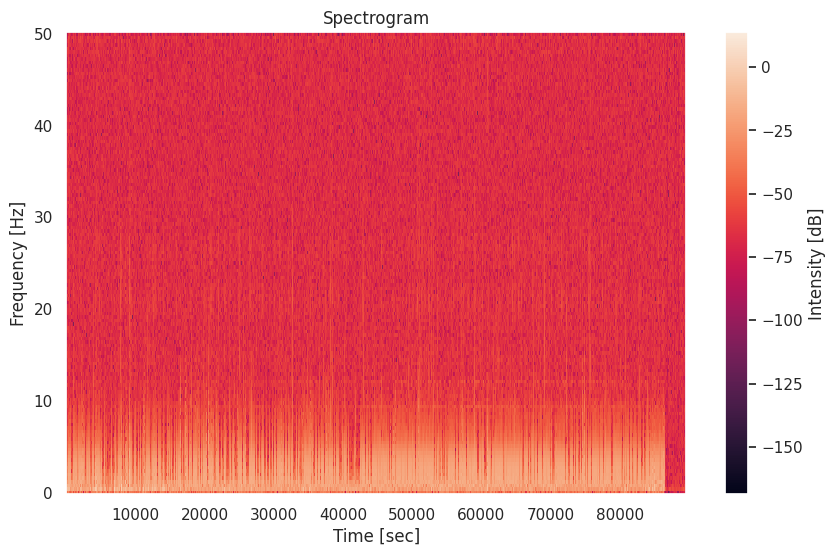

In [14]:
signal = df.dropna()
signal = df.dropna()

fs=100
ecg_signal = signal[SIGNAL_COL].values
time = signal[TIME_COL].values

f, t, Sxx = spectrogram(ecg_signal, fs)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')
plt.colorbar(label='Intensity [dB]')
plt.show()
# plt.savefig('spectrogram.png')

In [16]:
coefficients, frequencies = pywt.cwt(ecg_signal, np.arange(1, 128), 'cgau1', sampling_period=1 / fs)

plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), extent=[time.min(), time.max(), frequencies.min(), frequencies.max()], cmap='PRGn',
            aspect='auto', vmax=abs(coefficients).max(), vmin=-abs(coefficients).max())
plt.yscale('log')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Wavelet Transform')
plt.colorbar(label='Coefficient Magnitude')
plt.show()

KeyboardInterrupt: 

In [6]:
!ls drive/MyDrive/data/ecg2bp/vitlab_data

art_1001.parquet  art_533.parquet   ecg_3863.parquet	pleth_2417.parquet
art_1002.parquet  art_5340.parquet  ecg_3864.parquet	pleth_2419.parquet
art_1003.parquet  art_5342.parquet  ecg_3868.parquet	pleth_241.parquet
art_1004.parquet  art_5343.parquet  ecg_386.parquet	pleth_2420.parquet
art_1005.parquet  art_5344.parquet  ecg_3870.parquet	pleth_2421.parquet
art_1006.parquet  art_5346.parquet  ecg_3877.parquet	pleth_2422.parquet
art_1008.parquet  art_5347.parquet  ecg_3878.parquet	pleth_2424.parquet
art_1009.parquet  art_5348.parquet  ecg_3879.parquet	pleth_2425.parquet
art_1012.parquet  art_5349.parquet  ecg_387.parquet	pleth_2427.parquet
art_1013.parquet  art_5350.parquet  ecg_3880.parquet	pleth_2428.parquet
art_1015.parquet  art_5352.parquet  ecg_3881.parquet	pleth_242.parquet
art_1016.parquet  art_5353.parquet  ecg_3885.parquet	pleth_2432.parquet
art_1017.parquet  art_5355.parquet  ecg_3886.parquet	pleth_2433.parquet
art_1019.parquet  art_5356.parquet  ecg_3887.parquet	pleth_2434.parq

In [ ]:
len(os.listdir('drive/MyDrive/data/ecg2bp/vitlab_data'))

In [ ]:
DATA_SAMPLE_PATH = 'data_sample'
ECG_FILE_PATH = os.path.join(DATA_SAMPLE_PATH, 'ECG_II-20240912092357~20240912102356.csv')

In [ ]:
ecg = pd.read_csv(ECG_FILE_PATH,
                  header=None,
                  names=['datetime'] + list(range(500)),
                  parse_dates=["datetime"])

In [ ]:
ecg['datetime'].diff().describe()

count               3599
mean     0 days 00:00:01
std      0 days 00:00:00
min      0 days 00:00:01
25%      0 days 00:00:01
50%      0 days 00:00:01
75%      0 days 00:00:01
max      0 days 00:00:01
Name: datetime, dtype: object

In [ ]:
ecg['datetime'].diff().iloc[-1].total_seconds()

1.0